In [1]:
import torch
import torch.nn as nn
import torch.optim as optim

In [2]:
# Coefficients for ax³ + bx² + cx + d = 0
a = 2.0
b = -3.0
c = -11.0
d = 6.0

In [3]:
class CubicSolver(nn.Module):
    def __init__(self):
        super().__init__()
        self.x = nn.Parameter(torch.randn(1))
        self.relu = nn.ReLU()

    def forward(self):
        x = self.relu(self.x)
        equation = a*x**3 + b*x**2 + c*x + d
        return equation

In [4]:
model = CubicSolver()
optimizer = optim.SGD(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

In [5]:
epochs = 3000

for epoch in range(epochs):
    optimizer.zero_grad()

    output = model()
    loss = loss_fn(output, torch.tensor([0.0]))

    loss.backward()
    optimizer.step()

    if epoch % 300 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

Epoch 0, Loss: 36.0
Epoch 300, Loss: 36.0
Epoch 600, Loss: 36.0
Epoch 900, Loss: 36.0
Epoch 1200, Loss: 36.0
Epoch 1500, Loss: 36.0
Epoch 1800, Loss: 36.0
Epoch 2100, Loss: 36.0
Epoch 2400, Loss: 36.0
Epoch 2700, Loss: 36.0


In [6]:
print("\nLearned value of x:")
print(model.x.item())


Learned value of x:
-0.22420558333396912


In [7]:
losses = []

for epoch in range(epochs):
    optimizer.zero_grad()
    output = model()
    loss = loss_fn(output, torch.tensor([0.0]))
    loss.backward()
    optimizer.step()
    losses.append(loss.item())

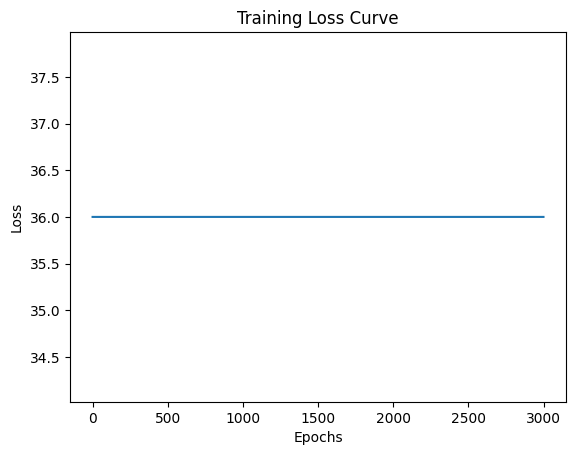

In [8]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()